###A minimalistic implementation of perceptron algorithm. 

In [66]:
#author jeevan_el
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


class Perceptron:
    """
    Simple python implementation of Perceptron algorithm invented by  Frank Rosenblatt
    """
    def __init__(self):
        self.weights = 0
    
    def learn(self,x,weights,labels):
        """This function accepts array of input vectors, weigths, labels and fits a straight line 
        to seperate the data points based on the specified labels.
        
        Parameters :
            x: numpy array of input vectors. Each vector represents a data point in d-dimension with a leading 1(bias)
            weights: d-dimension numpy vector
            labels: numpy array of labels 
        """
        i = 0
        converged = False
        total_iteration = 0
        no_data_points = len(x)
        self.weights = weights

        while i < no_data_points:
            if np.sign(np.dot(weights.T,x[i])) != labels[i]:# < 0:
                #misclassified, adjust weight
                weights = weights + labels[i]*x[i]  
                converged = False

            i = ((i+1)% (no_data_points))
            if i == no_data_points -1:
                if converged == True:
                    self.weights = weights
                    print "Optimized weight : ",weights 
                    #print "# of iterations to converge :",total_iteration
                    return weights
                else:
                    # "Reseting counter"
                    i = 0
                    total_iteration = total_iteration + 1
                    converged = True

    def predict(self,x):
        """This function takes a singe input vector ie., a data point and predicts the label corresponding to
        the input vector.
        
        Parameters :
            x: numpy array of an input vector. The vector represents a data point in d-dimension with a leading 1(bias)
        """
        return  -1 if np.dot(self.weights,x) < 0 else +1 
    
    def verification(self,x,labels):
        """This function takes an array of input vectors, array of labels and measures the number of 
        misclassified errors 
        
        Parameters :
            x: numpy array of an input vector. Each vector represents a data point in d-dimension with a leading 1(bias)
        """
        miss_classified_count = 0
        for i in range(0,len(x)):
            predicted_label = self.predict(x[i])
            if predicted_label != labels[i]:
                miss_classified_count = miss_classified_count + 1
                print "%s is misclassified as %s"%(x[i], predicted_label )
        print "Verification: Misclassified %s data points"%miss_classified_count
        return miss_classified_count
    
    def plot(self,x):
        """This function takes an array of input vectors and plots the input dat points along with fitted straight line
        
        Parameters :
            x: numpy array of an input vector. Each vector represents a data point in d-dimension with a leading 1(bias)
        """
        
        X = x[:,1]
        Y = x[:,2]
        plt.axis([np.amin(X)-5, np.amax(X)+10, np.amin(Y)-5, np.amax(Y)+10])
        plt.scatter (X,Y)
        intercept, slope =  self.weights[0], self.weights[1]
        plt.plot(X, ((X*slope + intercept)*1.0)/(-self.weights[2]), 'r')
        

Optimized weight :  [-1  3 -2]
Verification: Misclassified 0 data points
[4,1] belongs to class:  1
[1,4] belongs to class:  -1


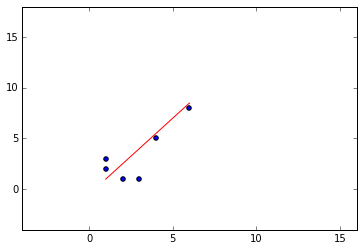

In [67]:
x = np.array([[1,1,3],[1,1,2],[1,2,1],[1,3,1],[1,4,5],[1,6,8]])
weights = np.array([0,0,0])
labels = np.array([-1,-1,+1,+1,+1,+1])

perceptron = Perceptron()
perceptron.learn(x,weights,labels)
perceptron.verification(x,labels)

print "[4,1] belongs to class: ",perceptron.predict(np.array([1,4,1]))
print "[1,4] belongs to class: ",perceptron.predict(np.array([1,1,4]))

perceptron.plot(x)

Optimized weight :  [ -1 -49  37]
Verification: Misclassified 0 data points


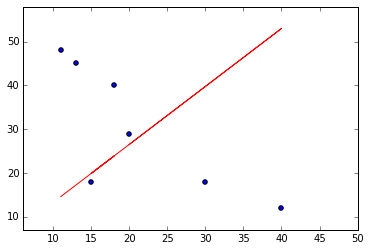

In [68]:
X2 = np.array([[1,20,29], [1,30,18],[1,40,12],[1,15,18],[1,18,40],[1,13,45],[1,11,48]])
labels2 = np.array([1,-1,-1,-1,1,1,1])
weights2 = np.array([0,0,0])

perceptron = Perceptron()

perceptron.learn(X2,weights2,labels2)
perceptron.verification(X2,labels2)
perceptron.plot(X2)


Optimized weight :  [-399    8    9]
Verification: Misclassified 0 data points


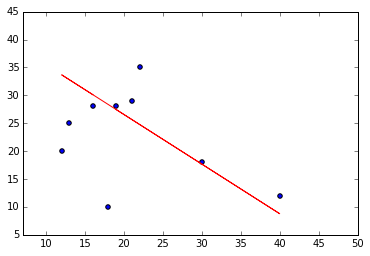

In [69]:
X3 = np.array([[1,19,28], [1,21,29],[1,22,35],[1,30,18],[1,40,12],[1,18,10],[1,12,20],[1,13,25],[1,16,28]])
labels3 = np.array([1,1,1,1,1,-1,-1,-1,-1])
weights3 = np.array([-300,0,0])

perceptron = Perceptron()
perceptron.learn(X3,weights3,labels3)
perceptron.verification(X3,labels3)
perceptron.plot(X3)

In [70]:
print "[20,15] belongs to class: ",perceptron.predict(np.array([1,20,15]))
print "[20,28] belongs to class: ",perceptron.predict(np.array([1,20,28]))

[20,15] belongs to class:  -1
[20,28] belongs to class:  1
